In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

# scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
url="https://raw.githubusercontent.com/digipodium/Datasets/main/automobile.csv"
df= pd.read_csv(url)
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   normalized-losses  205 non-null    object 
 3   make               205 non-null    object 
 4   fuel-type          205 non-null    object 
 5   aspiration         205 non-null    object 
 6   num-of-doors       205 non-null    object 
 7   body-style         205 non-null    object 
 8   drive-wheels       205 non-null    object 
 9   engine-location    205 non-null    object 
 10  wheel-base         205 non-null    float64
 11  length             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb-weight        205 non-null    int64  
 15  engine-type        205 non-null    object 
 16  num-of-cylinders   205 non

In [ ]:
df.describe()

,Unnamed: 0,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,0.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,51.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,102.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,153.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,204.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.describe(include='object')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


fixing missing values

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df.isna().sum()

Unnamed: 0            0
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
print(df['num-of-doors'].tolist()) # categorical

['two', 'two', 'two', 'four', 'four', 'two', 'four', 'four', 'four', 'two', 'two', 'four', 'two', 'four', 'four', 'four', 'two', 'four', 'two', 'two', 'four', 'two', 'two', 'two', 'four', 'four', 'four', nan, 'four', 'two', 'two', 'two', 'two', 'two', 'two', 'four', 'four', 'two', 'two', 'four', 'four', 'four', 'two', 'four', 'two', 'four', 'two', 'four', 'four', 'two', 'two', 'two', 'two', 'four', 'four', 'two', 'two', 'two', 'two', 'two', 'four', 'two', 'four', nan, 'four', 'four', 'four', 'four', 'four', 'two', 'four', 'four', 'two', 'four', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'two', 'four', 'four', 'four', 'four', 'two', 'two', 'two', 'four', 'four', 'two', 'two', 'four', 'four', 'two', 'four', 'four', 'four', 'four', 'four', 'two', 'two', 'two', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'two', 'two', 'four', 'four', 'four', 'four', 'two', 'two', 'two', 'two', 'two', 'two', 'four', 'two', 'two', 'four',

In [ ]:
print(df['horsepower'].tolist()) # numerical

['111', '111', '154', '102', '115', '110', '110', '110', '140', '160', '101', '101', '121', '121', '121', '182', '182', '182', '48', '70', '70', '68', '68', '102', '68', '68', '68', '102', '88', '145', '58', '76', '60', '76', '76', '76', '76', '86', '86', '86', '86', '101', '100', '78', '70', '70', '90', '176', '176', '262', '68', '68', '68', '68', '68', '101', '101', '101', '135', '84', '84', '84', '84', '64', '84', '120', '72', '123', '123', '123', '123', '155', '155', '184', '184', '175', '68', '68', '68', '102', '116', '88', '145', '145', '145', '88', '88', '116', '116', '69', '55', '69', '69', '69', '69', '69', '69', '69', '69', '97', '97', '152', '152', '152', '160', '200', '160', '97', '95', '97', '95', '95', '95', '95', '95', '97', '95', '142', '68', '102', '68', '68', '68', '88', '145', '143', '207', '207', '207', '288', nan, nan, '110', '110', '110', '110', '160', '160', '69', '73', '73', '82', '82', '94', '82', '111', '82', '94', '82', '111', '62', '62', '62', '62', '62', '6

In [ ]:
# numerical columns
num_cols_to_fix  = ['normalized-losses','bore','stroke','horsepower','peak-rpm']
# categorical columns
cat_cols_to_fix = ['num-of-doors']

In [ ]:
ni = SimpleImputer()
ci = SimpleImputer(strategy='most_frequent')

In [ ]:
df[num_cols_to_fix] = ni.fit_transform(df[num_cols_to_fix])
df[cat_cols_to_fix] = ci.fit_transform(df[cat_cols_to_fix])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(201, 27)

Encoding categorical features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    float64
 3   make               201 non-null    object 
 4   fuel-type          201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [ ]:
categorical_cols = ['make','fuel-type',
                    'aspiration','num-of-doors',
                    'body-style','drive-wheels',
                    'engine-location','engine-type',
                    'num-of-cylinders','fuel-system']
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make              201 non-null    object
 1   fuel-type         201 non-null    object
 2   aspiration        201 non-null    object
 3   num-of-doors      201 non-null    object
 4   body-style        201 non-null    object
 5   drive-wheels      201 non-null    object
 6   engine-location   201 non-null    object
 7   engine-type       201 non-null    object
 8   num-of-cylinders  201 non-null    object
 9   fuel-system       201 non-null    object
dtypes: object(10)
memory usage: 17.3+ KB


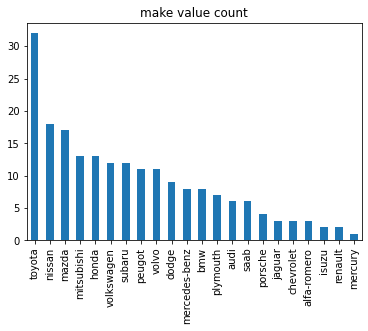

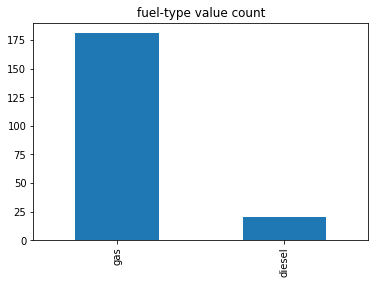

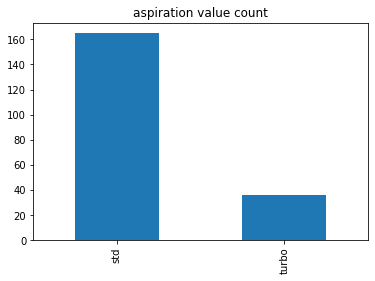

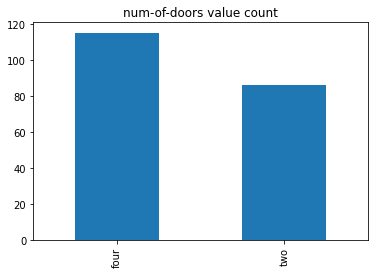

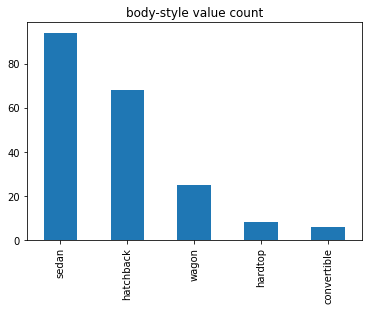

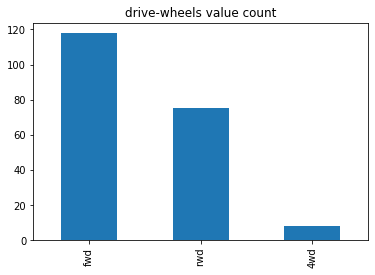

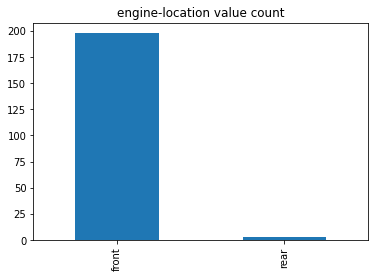

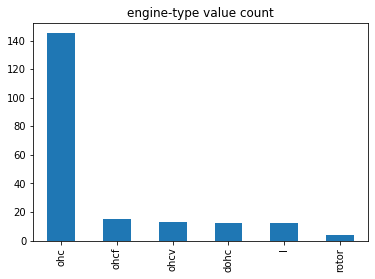

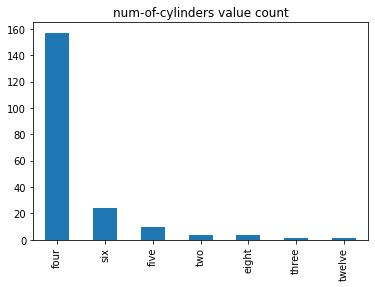

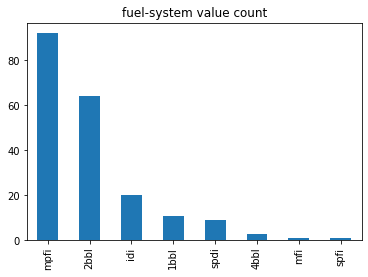

In [ ]:
cdf = df[categorical_cols].copy()
for col in cdf:
    cdf[col].value_counts().plot(kind='bar',title=f'{col} value count')
    plt.show()

In [ ]:
nod_enc = LabelEncoder()
asp_enc = LabelEncoder()
eng_enc = LabelEncoder()
fuel_enc = LabelEncoder()

# encode
df['num-of-doors'] = nod_enc.fit_transform(df['num-of-doors'])
df['aspiration'] = asp_enc.fit_transform(df['aspiration'])
df['engine-location'] = eng_enc.fit_transform(df['engine-location'])
df['fuel-type'] = fuel_enc.fit_transform(df['fuel-type'])
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,alfa-romero,1,0,1,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122.0,alfa-romero,1,0,1,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122.0,alfa-romero,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164.0,audi,1,0,0,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164.0,audi,1,0,0,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,95.0,volvo,1,0,0,sedan,rwd,0,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
201,201,-1,95.0,volvo,1,1,0,sedan,rwd,0,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
202,202,-1,95.0,volvo,1,0,0,sedan,rwd,0,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
203,203,-1,95.0,volvo,0,1,0,sedan,rwd,0,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [ ]:
make_enc = OneHotEncoder(drop='first')
body_style_enc = OneHotEncoder(drop='first')
drive_wheels_enc = OneHotEncoder(drop='first')
engine_type_enc = OneHotEncoder(drop='first')
fuel_system_enc = OneHotEncoder(drop='first')
noc_enc = OneHotEncoder(drop='first')
# encode
make_dummies = make_enc.fit_transform(df[['make']]).toarray()
body_style_dummies = body_style_enc.fit_transform(df[['body-style']]).toarray()
drive_wheels_dummies = drive_wheels_enc.fit_transform(df[['drive-wheels']]).toarray()
engine_type_dummies = engine_type_enc.fit_transform(df[['engine-type']]).toarray()
fuel_system_dummies = fuel_system_enc.fit_transform(df[['fuel-system']]).toarray()
noc_dummies = noc_enc.fit_transform(df[['num-of-cylinders']]).toarray()

In [ ]:
# drop categorical columns
cols_to_drop = ['make','body-style','drive-wheels',
                'engine-type','fuel-system','num-of-cylinders']
df.drop(columns=cols_to_drop,inplace=True,axis=1)

In [ ]:
make_dummies.shape, body_style_dummies.shape, drive_wheels_dummies.shape, engine_type_dummies.shape, fuel_system_dummies.shape, noc_dummies.shape,df.shape

NameError: name 'make_dummies' is not defined

In [ ]:
df.reset_index(inplace=True)

In [ ]:
# concatenate all dummies in df
final_df = pd.concat([pd.DataFrame(make_dummies),
                pd.DataFrame(body_style_dummies),
                pd.DataFrame(drive_wheels_dummies),
                pd.DataFrame(engine_type_dummies),
                pd.DataFrame(fuel_system_dummies),
                pd.DataFrame(noc_dummies),
                df],axis=1)

In [ ]:
final_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,0,1,2,3,0,1,0,1,2,3,4,0,1,2,3,4,5,6,0,1,2,3,4,5,index,Unnamed: 0,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,3,122.0,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,3,122.0,1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,122.0,1,0,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,3,2,164.0,1,0,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,4,2,164.0,1,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,200,200,-1,95.0,1,0,0,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,201,201,-1,95.0,1,1,0,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,202,202,-1,95.0,1,0,0,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,203,203,-1,95.0,0,1,0,0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [ ]:
final_df.to_csv('ready_for_training_automobile_data.csv',index=None)

In [ ]:
X = final_df.drop(columns=['price'])
y = final_df['price']

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

Normalizing features

In [ ]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

c:\Users\Ayush Srivastava\miniconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Ayush Srivastava\miniconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Ayush Srivastava\miniconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   0                  201 non-null    float64
 1   1                  201 non-null    float64
 2   2                  201 non-null    float64
 3   3                  201 non-null    float64
 4   4                  201 non-null    float64
 5   5                  201 non-null    float64
 6   6                  201 non-null    float64
 7   7                  201 non-null    float64
 8   8                  201 non-null    float64
 9   9                  201 non-null    float64
 10  10                 201 non-null    float64
 11  11                 201 non-null    float64
 12  12                 201 non-null    float64
 13  13                 201 non-null    float64
 14  14                 201 non-null    float64
 15  15                 201 non-null    float64
 16  16                 201 non